In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True).withColumnRenamed('sepal.length', 'sepal_length').withColumnRenamed('sepal.width', 'sepal_width').withColumnRenamed('petal.length', 'petal_length').withColumnRenamed('petal.width', 'petal_width')

In [142]:
df.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [143]:
df.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

In [145]:
df1 = df.groupby('variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [146]:
df2 = df.groupby('variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [147]:
df3 = df.groupby('variety').mean('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [0]:
Визуализируйте точечный график (plt.scatter) по каждой паре параметров

In [0]:
import seaborn as sns

In [0]:
df_f = df.select('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [0]:
pandas_df = df_f.toPandas()

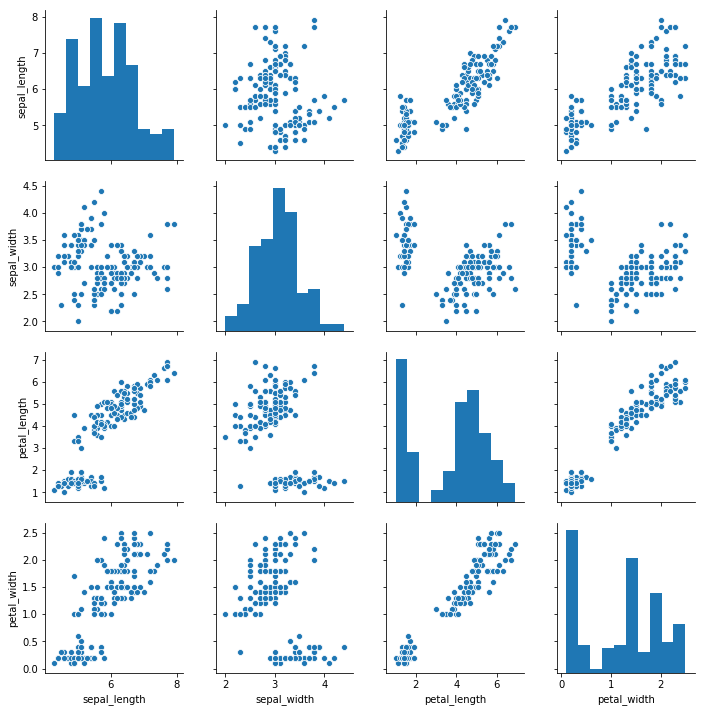

In [151]:
sns.pairplot(pandas_df)

Попробуйте отделить какой-нить тип цветка от всех остальных 
(сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, 
ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)

In [0]:
#Если значение sepal_width меньше petal_length то это скорее всего Versicolor

Сделайте отдельную колонку для своего предсказания

In [0]:
from pyspark.sql import functions as f

In [0]:
df_pred = df.withColumn('Predict', F.when(F.col('petal_length') > F.col('sepal_width'), "Versicolor").otherwise("Another"))

In [153]:
df_pred.show()

+------------+-----------+------------+-----------+-------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|Predict|
+------------+-----------+------------+-----------+-------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|Another|
|         4.9|        3.0|         1.4|        0.2| Setosa|Another|
|         4.7|        3.2|         1.3|        0.2| Setosa|Another|
|         4.6|        3.1|         1.5|        0.2| Setosa|Another|
|         5.0|        3.6|         1.4|        0.2| Setosa|Another|
|         5.4|        3.9|         1.7|        0.4| Setosa|Another|
|         4.6|        3.4|         1.4|        0.3| Setosa|Another|
|         5.0|        3.4|         1.5|        0.2| Setosa|Another|
|         4.4|        2.9|         1.4|        0.2| Setosa|Another|
|         4.9|        3.1|         1.5|        0.1| Setosa|Another|
|         5.4|        3.7|         1.5|        0.2| Setosa|Another|
|         4.8|        3.4|         1.6|        0

In [0]:
df_filter = df_pred.where((df_pred['variety'] == df_pred['Predict']))

In [130]:
df_filter.show()

+------------+-----------+------------+-----------+----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|   Predict|
+------------+-----------+------------+-----------+----------+----------+
|         7.0|        3.2|         4.7|        1.4|Versicolor|Versicolor|
|         6.4|        3.2|         4.5|        1.5|Versicolor|Versicolor|
|         6.9|        3.1|         4.9|        1.5|Versicolor|Versicolor|
|         5.5|        2.3|         4.0|        1.3|Versicolor|Versicolor|
|         6.5|        2.8|         4.6|        1.5|Versicolor|Versicolor|
|         5.7|        2.8|         4.5|        1.3|Versicolor|Versicolor|
|         6.3|        3.3|         4.7|        1.6|Versicolor|Versicolor|
|         4.9|        2.4|         3.3|        1.0|Versicolor|Versicolor|
|         6.6|        2.9|         4.6|        1.3|Versicolor|Versicolor|
|         5.2|        2.7|         3.9|        1.4|Versicolor|Versicolor|
|         5.0|        2.0|         3.5

In [138]:
df_filter.count()/df.count()

0.3333333333333333

In [0]:
#Угадал в 50 из 150 раз, т.е в 33% случаев